In [12]:
import numpy as np
import math
import scipy.linalg
import matplotlib.pyplot as plt
import lattice_class as lat

plt.rcParams["figure.dpi"] = 150
plt.rcParams["savefig.dpi"] = 150

### Chain Lattice

In [13]:
N = 1000
lattice = lat.ChainLattice(N)

### Square Lattice 

In [14]:
N = 20
lattice = lat.SquareLattice(N)

### Hexagonal Lattice

In [15]:
lattice = lat.Lattice()
for i in range(6):
    lattice.add_site((np.cos(i * 2 * np.pi / 6.0), np.sin(i * 2 * np.pi / 6.0)))

for i in range(6):
    lattice.add_edge((i, (i + 1) % 6))

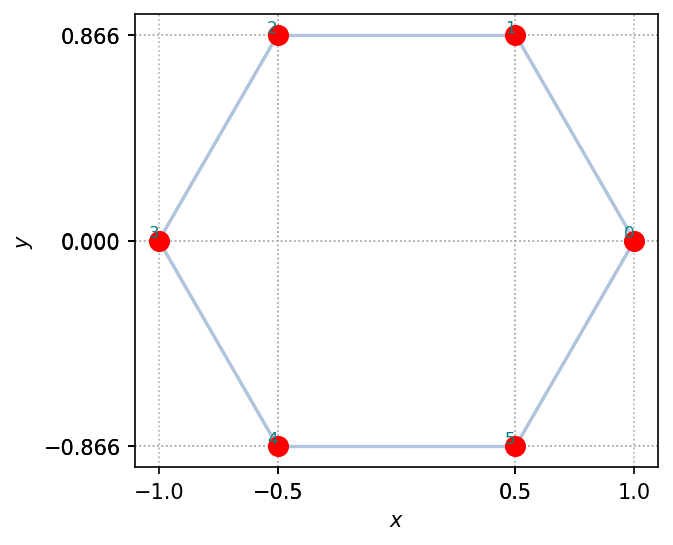

In [16]:
L = lattice.get_num_sites()
lattice.plot(True)

In [17]:
# define hamiltonian in number basis
site_energy = 0.0
tunelling_energy = 0.5

hamiltonian_matrix = np.zeros(shape=(L, L))
for i in range(L):
    hamiltonian_matrix[i, i] = site_energy
    for neighbour in lattice._edges[i]:
        hamiltonian_matrix[i, neighbour] = (
            hamiltonian_matrix[i, neighbour] + tunelling_energy
        )

# diagonalize Hamiltonian
energies, states = scipy.linalg.eigh(hamiltonian_matrix)

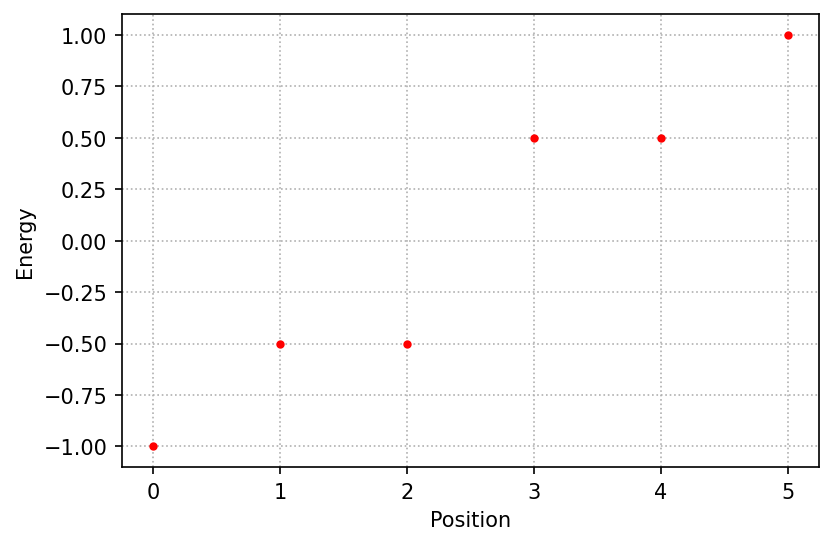

In [18]:
plt.grid(linestyle=":")
plt.xlabel("Position")
plt.ylabel("Energy")
plt.plot(energies, "r.")
plt.show()

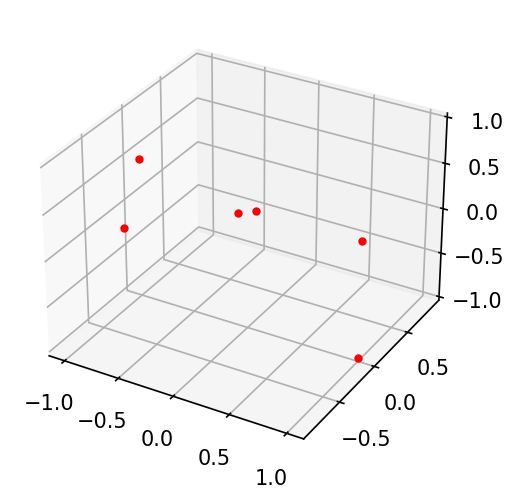

In [19]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection="3d")

x_position = [pos[0] for pos in lattice._sites]
y_position = [pos[1] for pos in lattice._sites]

ax.plot3D(x_position, y_position, energies, "r.")

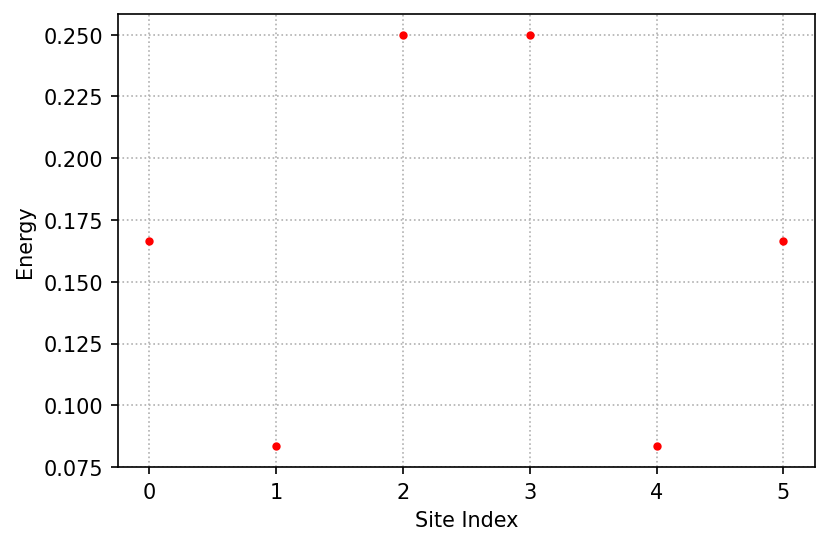

In [20]:
plt.grid(linestyle=":")
plt.xlabel("Site Index")
plt.ylabel("Energy")
plt.plot(np.square(states[4, :]), "r.")
plt.show()

/Users/isidorschoch/opt/miniconda3/envs/numerics/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


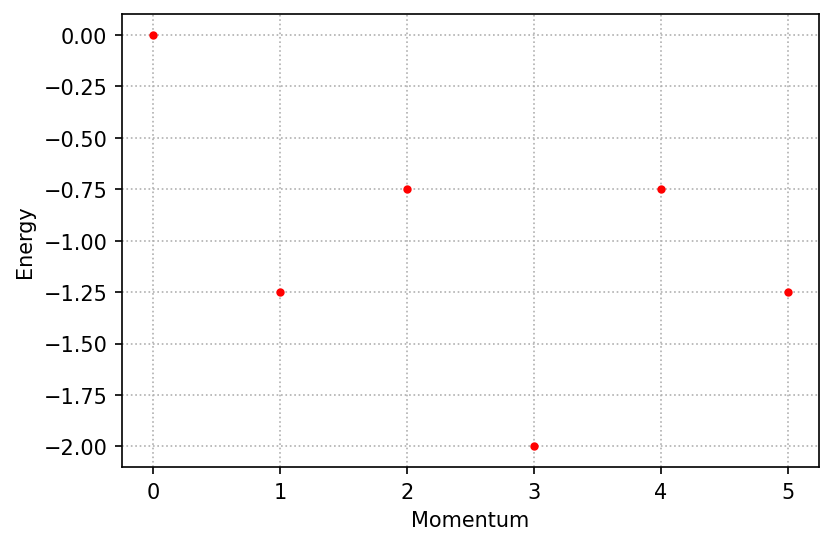

In [21]:
energies_k_space = np.fft.fft(energies)
plt.grid(linestyle=":")
plt.xlabel("Momentum")  # change
plt.ylabel("Energy")
plt.plot(energies_k_space, "r.")
plt.show()